<center><h1 style="color: #011f4b;">PROYECTO DE CLASE - ANÁLISIS DE SERIES DE TIEMPO</h1></center>


<center><h2 style="color: #03396c;">SERIE: ANALISIS TEMPORAL DE IMPORTACIONES</h2></center>

<span style="color: #03396c;">**Integrantes:**</span>
- Gabriel Peña
- Cesar Prieto
- Sebastian Gil

<h2 style="color: #03396c;">INTRODUCCION</h2>

Esta serie consta del valor FOB en dólares de las importaciones que llegan a los puertos de Colombia vía marítima y su destino final es la ciudad de Bogotá, en el periodo transcurrido entre enero del 2012 hasta diciembre de 2021, la serie es de tipo **mensual**.

**Definición:** El valor FOB en dólares de la mercancía, es valor de la mercancía en el momento que se carga a bordo del medio de transporte, en este caso el marítimo.

La serie consta de 120 observaciones, lo que corresponde a los 10 transcurridos desde el 2012 hasta el 2021

<span style="color: #03396c;">**Descripcion de la base:**</span>
- Importaciones <span style="color: #03396c;">**MENSUALES**</span> via maritima con destino a Bogotá
- 3401 Datos tomado (Desde el 01/2012 Hasta 12/2021)
- Variable a usar: <span style="color: #03396c;">**_VAFODO_**</span>

In [1]:
# Color2  <span style="color: #03396c;"></span>

<center><h1 style="color: #011f4b;">DESARROLLO</h1></center>

<h2 style="color: #011f4b;">IMPORTACION Y LIMPIEZA DE DATOS</h2>

Paquetes necesarios para el desarrollo del problema

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn import __version__ as sklearn_version
from sklearn import *

In [22]:
# Ruta del archivo CSV
archivo_csv = r'C:\Users\HP\OneDrive\Documentos\DOCUMENTOS PERSONAJES\CESAR\Series\Pro_Series\Series-de-Tiempo\Datos\Importaciones.csv'

# Cargar el archivo CSV en un DataFrame de pandas
Importaciones = pd.read_csv(archivo_csv, sep=',')

In [23]:
Importaciones.info()
print(Importaciones)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECH            143 non-null    float64
 1   VACIP           144 non-null    int64  
 2   VAFODO          144 non-null    float64
 3   FLETE           144 non-null    float64
 4   IMP1            144 non-null    float64
 5   VACID           144 non-null    float64
 6   PBK             144 non-null    float64
 7   PNK             144 non-null    float64
 8   CANU            81 non-null     float64
 9   fecha           144 non-null    object 
 10  mes             144 non-null    object 
 11  año             144 non-null    int64  
 12  fecha_completa  144 non-null    object 
dtypes: float64(8), int64(2), object(3)
memory usage: 14.8+ KB
            FECH              VACIP        VAFODO         FLETE          IMP1  \
0     53706318.0       869285742501  1.579419e+10  1.039715e+11  9.063473e+1

In [24]:
#Exploracion de las variables encontradas en la base
Variables = Importaciones[['fecha_completa', 'VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']].copy()

# Convertir la columna 'fecha_completa' a formato de fecha
Variables['fecha_completa'] = pd.to_datetime(Variables['fecha_completa'])

Variables.info()
Variables.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_completa  144 non-null    datetime64[ns]
 1   VACIP           144 non-null    int64         
 2   VAFODO          144 non-null    float64       
 3   FLETE           144 non-null    float64       
 4   IMP1            144 non-null    float64       
 5   VACID           144 non-null    float64       
 6   PBK             144 non-null    float64       
 7   PNK             144 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 9.1 KB


fecha_completa          VACIP        VAFODO         FLETE          IMP1  \
0     2012-01-01   869285742501  1.579419e+10  1.039715e+11  9.063473e+10   
1     2012-02-01   753291179381  1.787081e+10  5.944155e+10  8.521563e+10   
2     2012-03-01   970221001405  1.969805e+10  8.800024e+10  1.190929e+11   
3     2012-04-01   829378952699  1.597839e+10  8.199698e+10  1.523165e+11   
4     2012-05-01  1041614618811  2.355538e+10  1.157984e+11  1.217380e+11   

          VACID           PBK           PNK  
0  2.243658e+12  2.727896e+10  5.725524e+09  
1  1.327547e+12  6.703622e+09  1.794043e+10  
2  1.990896e+12  2.428291e+10  5.363545e+09  
3  1.724013e+12  1.018825e+10  5.578638e+09  
4  2.454812e+12  2.360439e+10  6.344622e+09

In [25]:
Variables[['VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']] = Variables[['VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']].div(1000000000)
Variables.head(5)

fecha_completa        VACIP     VAFODO       FLETE        IMP1        VACID  \
0     2012-01-01   869.285743  15.794190  103.971527   90.634731  2243.657871   
1     2012-02-01   753.291179  17.870806   59.441549   85.215632  1327.547259   
2     2012-03-01   970.221001  19.698045   88.000244  119.092896  1990.895960   
3     2012-04-01   829.378953  15.978388   81.996980  152.316541  1724.013363   
4     2012-05-01  1041.614619  23.555380  115.798390  121.737966  2454.811904   

         PBK        PNK  
0  27.278956   5.725524  
1   6.703622  17.940430  
2  24.282915   5.363545  
3  10.188252   5.578638  
4  23.604388   6.344622

Hasta este punto solo hemos preparado nuestros datos, asegurandonos que las variables tuvieran el tipo correcto de dato, y para una exploracion más sencilla la conversion o el reescalado de las variables numericas que respresentan un valor de la accion, este reescalado mencionado consiste en eliminar los miles de millones "000000000", es decir 9 ceros, de los valores obtenidos.

A continuacion nos disponemos a revisar como se verian las series de estas variables.

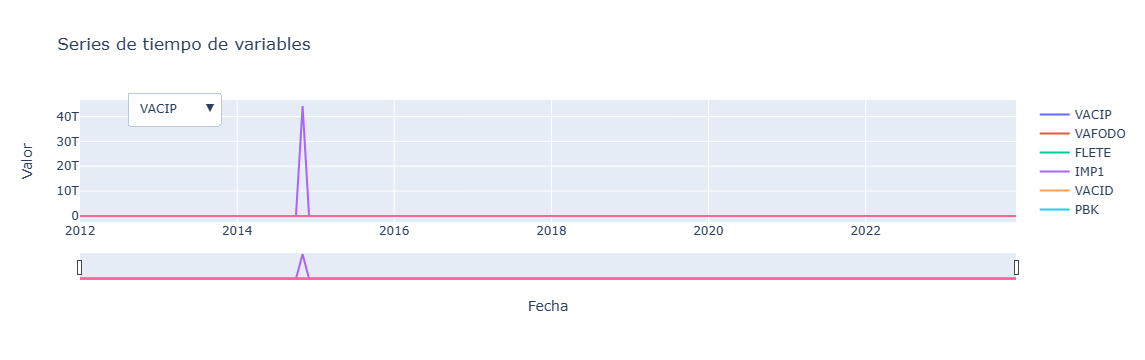

In [26]:
import plotly.graph_objects as go

# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VACIP'], mode='lines', name='VACIP'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VAFODO'], mode='lines', name='VAFODO'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['FLETE'], mode='lines', name='FLETE'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['IMP1'], mode='lines', name='IMP1'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VACID'], mode='lines', name='VACID'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['PBK'], mode='lines', name='PBK'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['PNK'], mode='lines', name='PNK'))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="VACIP",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False]},
                           {"title": "Serie de tiempo variable VACIP"}]),
                dict(label="VAFODO",
                     method="update",
                     args=[{"visible": [False, True, False, False, False, False, False]},
                           {"title": "Serie de tiempo variable VAFODO"}]),
                dict(label="FLETE",
                     method="update",
                     args=[{"visible": [False, False, True, False, False, False, False]},
                           {"title": "Serie de tiempo variable FLETE"}]),
                dict(label="IMP1",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False, False]},
                           {"title": "Serie de tiempo variable IMP1"}]),
                dict(label="VACID",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False, False]},
                           {"title": "Serie de tiempo variable VACID"}]),
                dict(label="PBK",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True, False]},
                           {"title": "Serie de tiempo variable PBK"}]),
                dict(label="PNK",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, True]},
                           {"title": "Serie de tiempo variable PNK"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Series de tiempo de variables')

# Mostrar el gráfico
fig.show()

Del gafico anterio podemos conlcuir que todas las variables se comportan de una manera muy diferente en el tiempo explorado, por lo cual la eleccion de la variable en la que nos centraremos sera aquella que presente un comportamiento más "Estable" ene el tiempo.

<h2 style="color: #011f4b;">ELECCION DE LA VARIABLE Y DESARROLLO DE METODOLOGIAS</h2>

En la parte anterior del codigo pudimos ver como todas las variables poseen un comportamiento bastante diferente. Por esto hemos decidido que la variable elegida para desarrollar el proyecto sera la  <span style="color: #03396c;">**_VAFODO_**</span> o mejor dicho el Valor FOB dólares de la mercancía. Valor de la mercancia  en el momento que se carga a bordo del medio de transporte  marítimo.

In [28]:
# Seleccionar solo las columnas 'fecha_completa' y 'VAFODO'
Serie = Variables[['fecha_completa', 'VAFODO']]
print(Serie)

    fecha_completa      VAFODO
0       2012-01-01   15.794190
1       2012-02-01   17.870806
2       2012-03-01   19.698045
3       2012-04-01   15.978388
4       2012-05-01   23.555380
..             ...         ...
139     2023-08-01   94.747376
140     2023-09-01   89.642116
141     2023-10-01    1.523791
142     2023-11-01  109.342708
143     2023-12-01   95.723639

[144 rows x 2 columns]


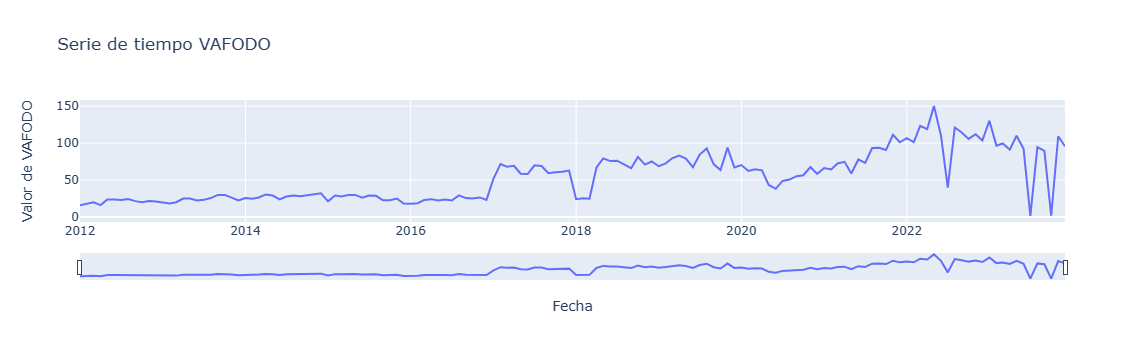

In [29]:
import plotly.graph_objects as go
import pandas as pd

# Crear la serie de tiempo con Pandas Time Series (ts)
VAFODO_series = pd.Series(Serie['VAFODO'].values, index=Serie['fecha_completa'])

# Crear la figura de Plotly
fig = go.Figure()

# Agregar la serie de tiempo al gráfico
fig.add_trace(go.Scatter(x=VAFODO_series.index, y=VAFODO_series.values, mode='lines'))

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor de VAFODO')

# Actualizar el título del gráfico
fig.update_layout(title='Serie de tiempo VAFODO')

# Mostrar el gráfico
fig.show()

<h3 style="color: #011f4b;">TRANSFORMACION DE BOX-COX PARA REDUCCION DE LA VARIANZA</h3>

In [30]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data, fitted_lambda = stats.boxcox(Serie['VAFODO'])
print("Lambda óptimo para Box-Cox:", fitted_lambda)

# Aplicar la transformación de Box-Cox a la serie de tiempo de Apertura
serie_boxcox = boxcox(Serie['VAFODO'], lmbda=fitted_lambda)
print(serie_boxcox)

Lambda óptimo para Box-Cox: 0.40834708717271845
[ 5.10852096  5.49950723  5.82184453  5.14438824  6.44842968  6.44123175
  6.34582532  6.53071311  6.10329915  5.85467033  6.10864513  6.02805932
  5.71646841  5.56381272  5.85791632  6.65395683  6.63815615  6.2444584
  6.37800207  6.7405044   7.33673961  7.34544103  6.82506829  6.24993533
  6.74336791  6.62145471  6.85780947  7.43456957  7.2340685   6.46011501
  7.0523269   7.23189607  7.10666014  7.30474859  7.3937198   7.63645346
  6.06386821  7.22925337  7.06795649  7.34741062  7.34928473  6.83707836
  7.24164399  7.17772536  6.28148139  6.29379801  6.64494561  5.5203877
  5.50730657  5.60673831  6.3641964   6.52656859  6.23775685  6.43884028
  6.24841717  7.25660508  6.74444018  6.66747039  6.86879485  6.3689962
  9.84649501 11.56385732 11.27722213 11.37365676 10.45622997 10.4150256
 11.42312303 11.35079565 10.50665719 10.64446931 10.6830847  10.82477615
  6.50110855  6.68873182  6.62318619 11.18183512 12.16377006 11.87993376
 11.920

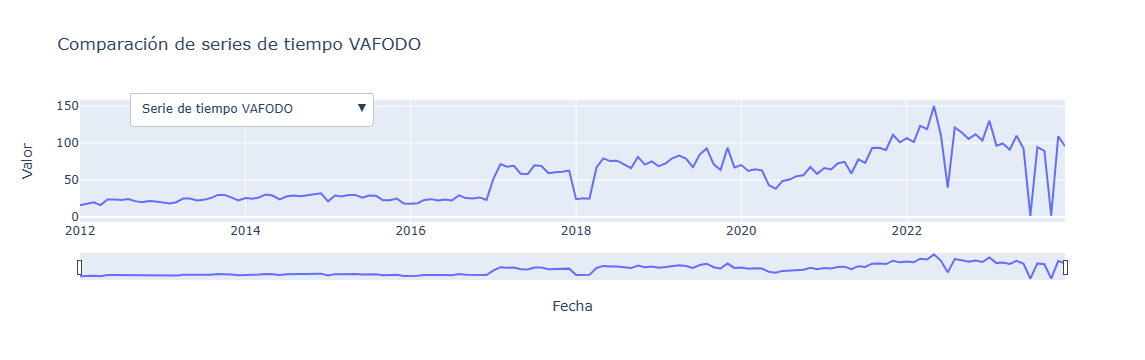

In [33]:
# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=Serie['fecha_completa'], y=Serie['VAFODO'], mode='lines', name='Serie de tiempo VAFODO'))
fig.add_trace(go.Scatter(x=Serie['fecha_completa'], y=serie_boxcox, mode='lines', name='Serie de tiempo VAFODO-BoxCox', visible=False))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Serie de tiempo VAFODO",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Serie de tiempo VAFODO"}]),
                dict(label="Serie de tiempo VAFODO-BoxCox",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Serie de tiempo VAFODO-BoxCox"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Comparación de series de tiempo VAFODO')

# Mostrar el gráfico
fig.show()

<h3 style="color: #011f4b;">TRANSFORMACION LOGARITMICA</h3>

In [32]:
# Calcular el lambda óptimo para la transformación logarítmica
optimal_lambda_log = np.argmax(np.abs(np.diff(np.log(Serie['VAFODO']))))
print("Lambda óptimo para transformación logarítmica:", optimal_lambda_log)

# Aplicar la transformación logarítmica a la serie de tiempo de Apertura
Serie_log = np.log(Serie['VAFODO'])

Lambda óptimo para transformación logarítmica: 141


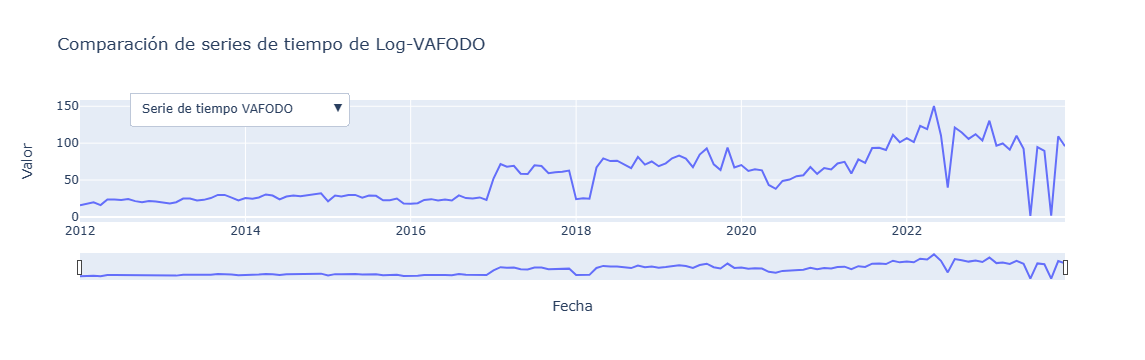

In [36]:
# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=Serie['fecha_completa'], y=Serie['VAFODO'], mode='lines', name='Serie de tiempo VAFODO'))
fig.add_trace(go.Scatter(x=Serie['fecha_completa'], y=Serie_log, mode='lines', name='Serie de tiempo Log-VAFODO', visible=False))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Serie de tiempo VAFODO",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Serie de tiempo VAFODO"}]),
                dict(label="Serie de tiempo Log-VAFODO",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Serie de tiempo Log-VAFODO"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Comparación de series de tiempo de Log-VAFODO')

# Mostrar el gráfico
fig.show()

A partir de este punto intentaremos mostrar los resultados para ambas series teniendo en cuenta los datos en su escala original y los datos en escala log, esto con la intencion de tener una comparacion más directa sobre lo que puede causar la tranformacion de los datos en los resultados de nuestro ejercicio.

<h3 style="color: #011f4b;">ESTIMACION Y ELIMINACION DE LA TENDENCIA</h3>

In [37]:
import statsmodels.api as sm

# Estimación de la tendencia utilizando lm (regresión lineal) para datos originales
X_original = sm.add_constant(np.arange(len(Serie['VAFODO'])))  # Añadir una columna de unos para intercepto
fit_Apertura_original = sm.OLS(Serie['VAFODO'], X_original).fit()

# Imprimir resumen del modelo para datos originales
print(fit_Apertura_original.summary())

                            OLS Regression Results                            
Dep. Variable:                 VAFODO   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     244.3
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           1.15e-32
Time:                        16:34:44   Log-Likelihood:                -634.72
No. Observations:                 144   AIC:                             1273.
Df Residuals:                     142   BIC:                             1279.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7396      3.316      2.937      0.0

In [38]:
# Modelo en escala log para los datos en escala logarítmica
log_original_data = np.log(Serie['VAFODO'])
X_log = sm.add_constant(np.arange(len(log_original_data)))  # Añadir una columna de unos para intercepto
fit_logApertura_log = sm.OLS(log_original_data, X_log).fit()

# Imprimir resumen del modelo en escala log para los datos en escala logarítmica
print(fit_logApertura_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 VAFODO   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     87.55
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           1.66e-16
Time:                        16:35:02   Log-Likelihood:                -126.78
No. Observations:                 144   AIC:                             257.6
Df Residuals:                     142   BIC:                             263.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9902      0.097     30.686      0.0


"RESULTADOS DE LOS MODELOS PARA AMBAS SERIES"


In [39]:
original_data = Serie['VAFODO']

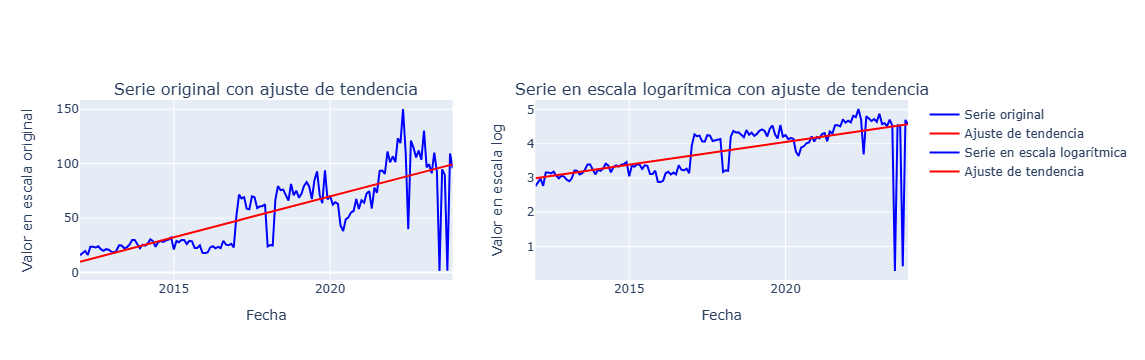

In [41]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Crear subgráficos con make_subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Serie original con ajuste de tendencia', 'Serie en escala logarítmica con ajuste de tendencia'))

# Agregar trazas al primer panel
fig.add_trace(go.Scatter(x=Serie['fecha_completa'], y=original_data, mode='lines', name='Serie original', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=Serie['fecha_completa'], y=fit_Apertura_original.fittedvalues, mode='lines', name='Ajuste de tendencia', line=dict(color='red')), row=1, col=1)

# Agregar trazas al segundo panel
fig.add_trace(go.Scatter(x=Serie['fecha_completa'], y=log_original_data, mode='lines', name='Serie en escala logarítmica', line=dict(color='blue')), row=1, col=2)
fig.add_trace(go.Scatter(x=Serie['fecha_completa'], y=fit_logApertura_log.fittedvalues, mode='lines', name='Ajuste de tendencia', line=dict(color='red')), row=1, col=2)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', row=1, col=1)
fig.update_xaxes(title_text='Fecha', row=1, col=2)

# Actualizar el diseño del eje y para el primer panel
fig.update_yaxes(title_text='Valor en escala original', row=1, col=1)

# Actualizar el diseño del eje y para el segundo panel
fig.update_yaxes(title_text='Valor en escala log', row=1, col=2)

# Mostrar el gráfico
fig.show()

In [42]:
# Eliminamos la tendencia de la serie original
Apertura_sin_tendencia = original_data - fit_Apertura_original.fittedvalues

# Eliminamos la tendencia de la serie en escala logarítmica
logApertura_sin_tendencia = log_original_data - fit_logApertura_log.fittedvalues

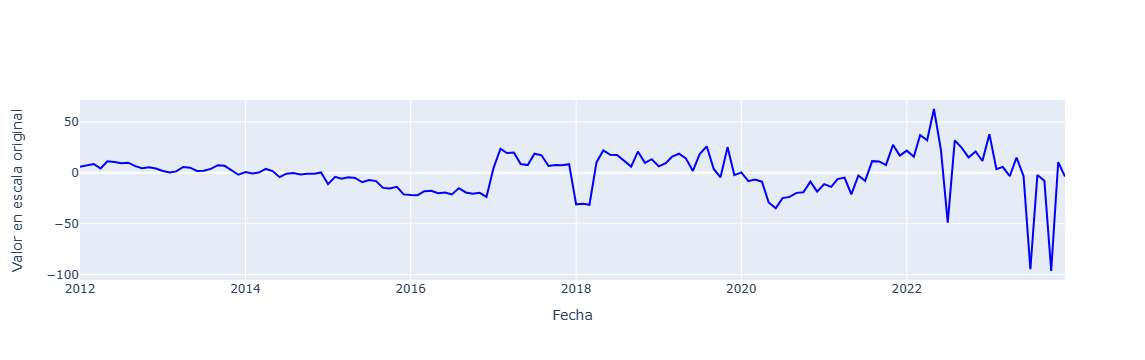

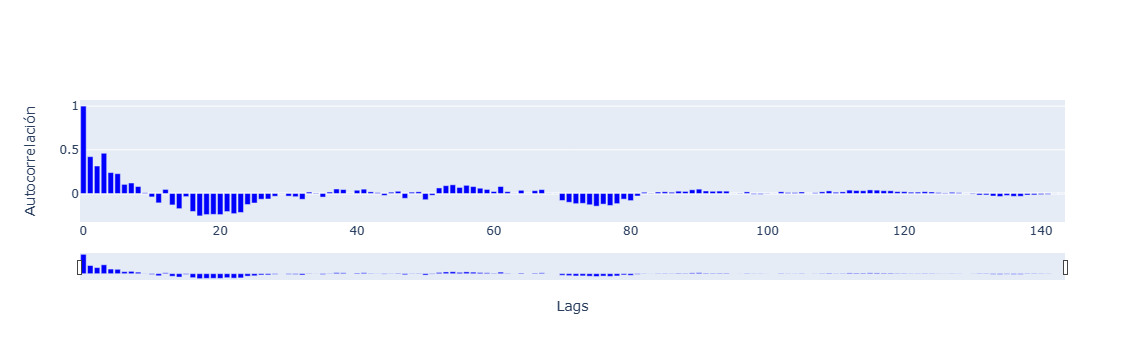

In [44]:
import plotly.subplots as sp
import plotly.graph_objects as go
import pandas as pd
import statsmodels.api as sm

# Calcular autocorrelaciones para la serie en escala original
autocorrelation_original = sm.tsa.acf(Apertura_sin_tendencia, nlags=len(Apertura_sin_tendencia)-1)

# Crear una figura de Plotly para la serie en escala original
fig_original = go.Figure()

# Agregar la serie en escala original
fig_original.add_trace(go.Scatter(x=Serie['fecha_completa'], y=Apertura_sin_tendencia, mode='lines', name='Serie en escala original', line=dict(color='blue')))

# Actualizar el diseño del eje x y y
fig_original.update_xaxes(title_text='Fecha')
fig_original.update_yaxes(title_text='Valor en escala original')

# Mostrar la serie en escala original
fig_original.show()

# Crear una figura de Plotly para el autocorrelograma en escala original
fig_autocorrelation_original = go.Figure()

# Agregar el autocorrelograma en escala original
fig_autocorrelation_original.add_trace(go.Bar(x=list(range(len(Apertura_sin_tendencia))), y=autocorrelation_original, name='Autocorrelograma en escala original', marker=dict(color='blue')))

# Actualizar el diseño del eje x y y
fig_autocorrelation_original.update_xaxes(title_text='Lags')
fig_autocorrelation_original.update_yaxes(title_text='Autocorrelación')

# Agregar Range Slider para seleccionar un rango de lags
fig_autocorrelation_original.update_layout(
    xaxis=dict(title='Lags', rangeslider=dict(visible=True), type='linear')
)

# Mostrar el autocorrelograma en escala original
fig_autocorrelation_original.show()

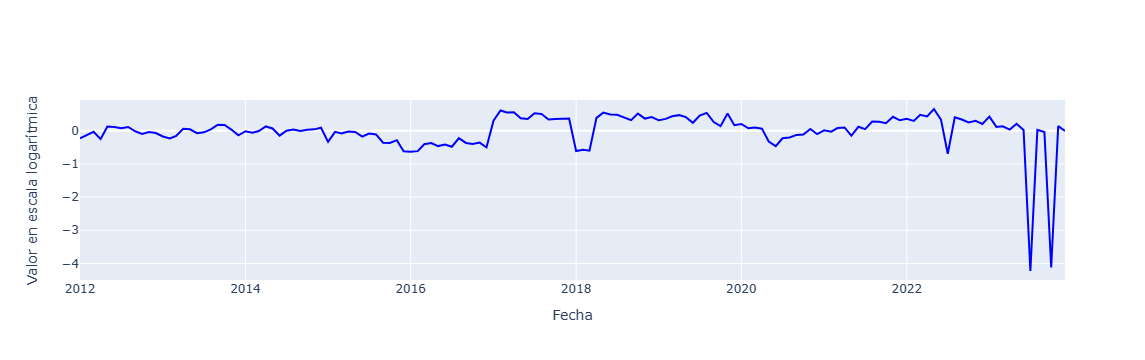

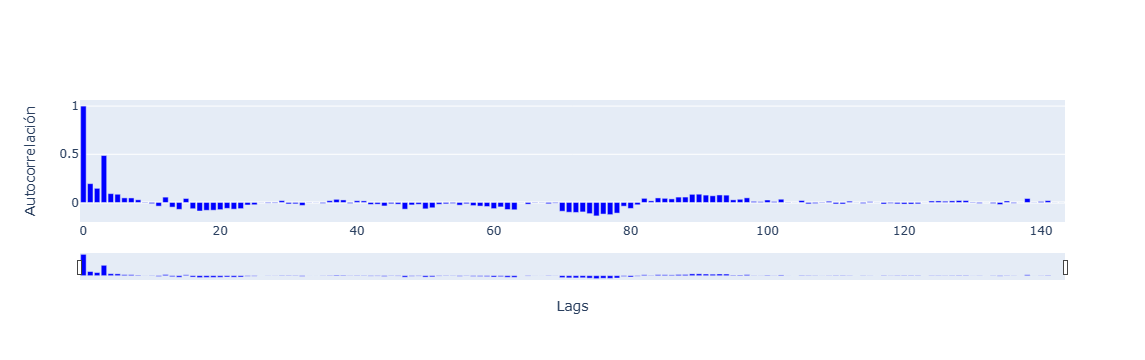

In [45]:
import plotly.graph_objects as go
import statsmodels.api as sm

# Calcular autocorrelaciones para la serie en escala logarítmica
autocorrelation_log = sm.tsa.acf(logApertura_sin_tendencia, nlags=len(logApertura_sin_tendencia)-1)

# Crear una figura de Plotly para la serie en escala logarítmica
fig_log = go.Figure()

# Agregar la serie en escala logarítmica
fig_log.add_trace(go.Scatter(x=Serie['fecha_completa'], y=logApertura_sin_tendencia, mode='lines', name='Serie en escala logarítmica', line=dict(color='blue')))

# Actualizar el diseño del eje x y y
fig_log.update_xaxes(title_text='Fecha')
fig_log.update_yaxes(title_text='Valor en escala logarítmica')

# Mostrar la serie en escala logarítmica
fig_log.show()

# Crear una figura de Plotly para el autocorrelograma en escala logarítmica
fig_autocorrelation_log = go.Figure()

# Agregar el autocorrelograma en escala logarítmica
fig_autocorrelation_log.add_trace(go.Bar(x=list(range(len(logApertura_sin_tendencia))), y=autocorrelation_log, name='Autocorrelograma en escala logarítmica', marker=dict(color='blue')))

# Actualizar el diseño del eje x y y
fig_autocorrelation_log.update_xaxes(title_text='Lags')
fig_autocorrelation_log.update_yaxes(title_text='Autocorrelación')

# Agregar Range Slider para seleccionar un rango de lags
fig_autocorrelation_log.update_layout(
    xaxis=dict(title='Lags', rangeslider=dict(visible=True), type='linear')
)

# Mostrar el autocorrelograma en escala logarítmica
fig_autocorrelation_log.show()

<h3 style="color: #011f4b;">DESCOMPOSICION DE LAS SERIES</h3>

<h3 style="color: #011f4b;">ESCALA ORIGINAL</h3>

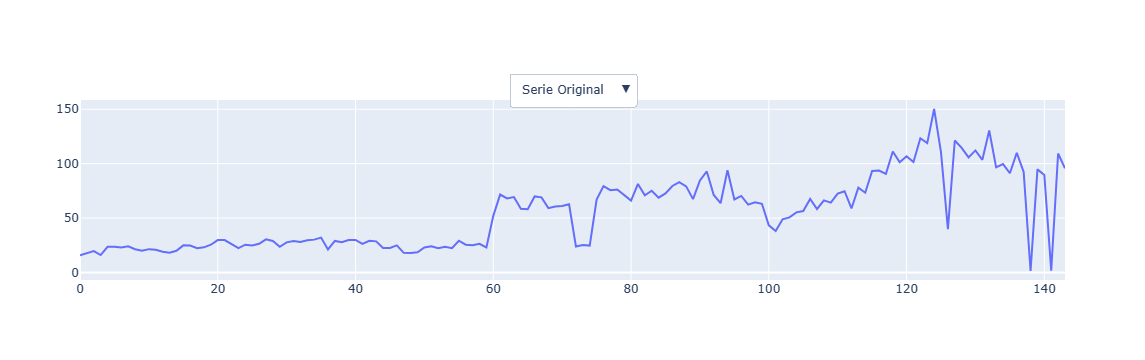

In [46]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición estacional utilizando seasonal_decompose
result = seasonal_decompose(Serie['VAFODO'], model='additive', period=12)  # Ajusta el período según sea necesario

# Crear una figura de Plotly para la descomposición estacional
fig = go.Figure()

# Agregar la serie original a la figura
fig.add_trace(go.Scatter(x=Serie['VAFODO'].index, y=Serie['VAFODO'], mode='lines', name='Serie Original', visible=True))

# Configurar títulos y etiquetas de ejes
titles = ['Serie Original', 'Tendencia', 'Estacionalidad', 'Residual']
y_labels = ['Valor', 'Tendencia', 'Estacionalidad', 'Residual']

# Crear botones para cambiar entre los gráficos
buttons = []
for i, title in enumerate(titles):
    visibility = [False] * len(titles)
    visibility[i] = True
    button = dict(label=title,
                  method="update",
                  args=[{"visible": visibility},
                        {"title": title,
                         "yaxis": {"title": {"text": y_labels[i]}}}],
                  )
    buttons.append(button)

# Agregar la tendencia a la figura
fig.add_trace(go.Scatter(x=ARGOS.index, y=result.trend, mode='lines', name='Tendencia', visible=False))

# Agregar la estacionalidad a la figura
fig.add_trace(go.Scatter(x=ARGOS.index, y=result.seasonal, mode='lines', name='Estacionalidad', visible=False))

# Agregar el residuo a la figura
fig.add_trace(go.Scatter(x=ARGOS.index, y=result.resid, mode='lines', name='Residual', visible=False))

# Agregar botones al layout
fig.update_layout(
    updatemenus=[
        {
            "buttons": buttons,
            "direction": "down",
            "showactive": True,
            "x": 0.5,
            "xanchor": "center",
            "y": 1.15,
            "yanchor": "top"
        }
    ]
)

# Mostrar la figura
fig.show()


<h3 style="color: #011f4b;">ESCALA LOG</h3>

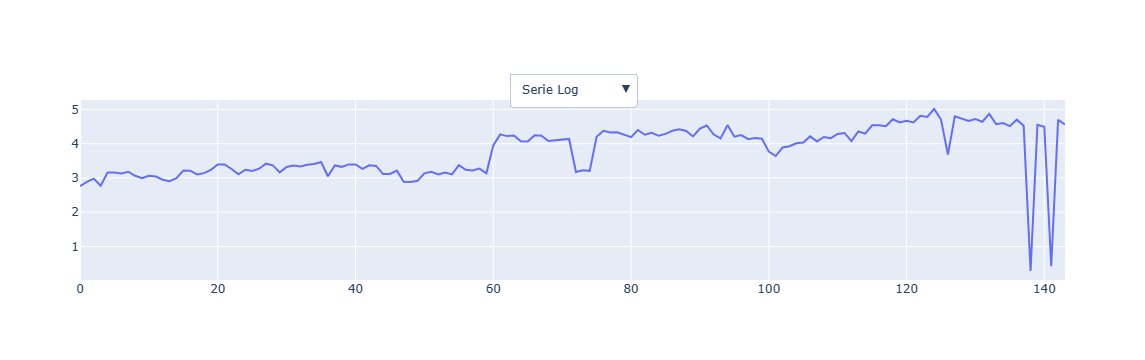

In [47]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición estacional utilizando seasonal_decompose
result = seasonal_decompose(np.log(Serie['VAFODO']), model='additive', period=12)  # Ajusta el período según sea necesario

# Crear una figura de Plotly para la descomposición estacional
fig = go.Figure()

# Agregar la serie original en escala logarítmica a la figura
fig.add_trace(go.Scatter(x=Serie['VAFODO'].index, y=np.log(Serie['VAFODO']), mode='lines', name='Serie log', visible=True))

# Configurar títulos y etiquetas de ejes
titles = ['Serie Log', 'Tendencia', 'Estacionalidad', 'Residual']
y_labels = ['Valor', 'Tendencia', 'Estacionalidad', 'Residual']

# Crear botones para cambiar entre los gráficos
buttons = []
for i, title in enumerate(titles):
    visibility = [False] * len(titles)
    visibility[i] = True
    button = dict(label=title,
                  method="update",
                  args=[{"visible": visibility},
                        {"title": title,
                         "yaxis": {"title": {"text": y_labels[i]}}}],
                  )
    buttons.append(button)

# Agregar la tendencia a la figura
fig.add_trace(go.Scatter(x=ARGOS.index, y=result.trend, mode='lines', name='Tendencia', visible=False))

# Agregar la estacionalidad a la figura
fig.add_trace(go.Scatter(x=ARGOS.index, y=result.seasonal, mode='lines', name='Estacionalidad', visible=False))

# Agregar el residuo a la figura
fig.add_trace(go.Scatter(x=ARGOS.index, y=result.resid, mode='lines', name='Residual', visible=False))

# Agregar botones al layout
fig.update_layout(
    updatemenus=[
        {
            "buttons": buttons,
            "direction": "down",
            "showactive": True,
            "x": 0.5,
            "xanchor": "center",
            "y": 1.15,
            "yanchor": "top"
        }
    ]
)

# Mostrar la figura
fig.show()


<h3 style="color: #011f4b;">DIFERENCIA ORDINARA</h3>

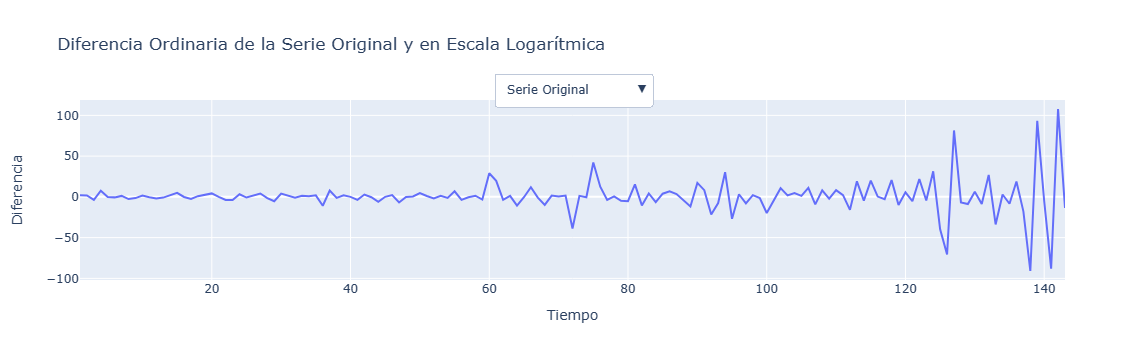

In [48]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Diferencia ordinaria de la serie original
diff_serie = np.diff(Serie['VAFODO'])

# Diferencia ordinaria de la serie en escala logarítmica
diff_lserie = np.diff(np.log(Serie['VAFODO']))

# Crear una figura de Plotly para las diferencias ordinarias
fig = go.Figure()

# Agregar la diferencia ordinaria de la serie original a la figura
fig.add_trace(go.Scatter(x=Serie['VAFODO'].index[1:], y=diff_serie, mode='lines', name='Diferencia Ordinaria Serie Original', visible=True))

# Agregar la diferencia ordinaria de la serie en escala logarítmica a la figura
fig.add_trace(go.Scatter(x=Serie['VAFODO'].index[1:], y=diff_lserie, mode='lines', name='Diferencia Ordinaria Serie en Escala Logarítmica', visible=False))

# Configurar título y etiquetas de ejes
fig.update_layout(title='Diferencia Ordinaria de la Serie Original y en Escala Logarítmica',
                  xaxis_title='Tiempo',
                  yaxis_title='Diferencia')

# Configurar botón para cambiar entre las diferencias ordinarias
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [{"visible": [True, False]}, {"title": "Diferencia Ordinaria Serie Original"}],
                    "label": "Serie Original",
                    "method": "update"
                },
                {
                    "args": [{"visible": [False, True]}, {"title": "Diferencia Ordinaria Serie en Escala Logarítmica"}],
                    "label": "Serie en Escala Log",
                    "method": "update"
                }
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.5,
            "xanchor": "center",
            "y": 1.15,
            "yanchor": "top"
        }
    ]
)

# Mostrar la figura
fig.show()

<h3 style="color: #011f4b;">RELACIONES NO LINEALES USANDO LA DISPERSION</h3>

<h3 style="color: #011f4b;">ESCALA ORIGINAL</h3>

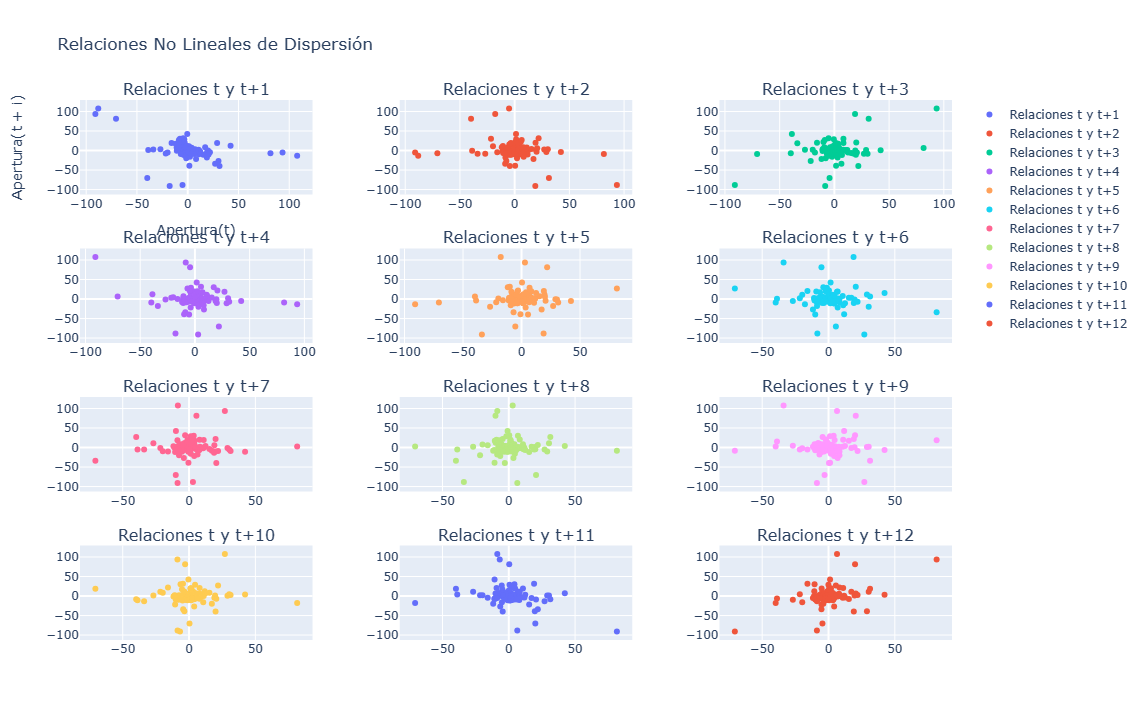

In [49]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convertir la serie a un objeto de Pandas Series
diff_serie = pd.Series(diff_serie)

# Crear una figura con subtramas para mostrar todas las gráficas en una cuadrícula
fig = make_subplots(rows=4, cols=3, subplot_titles=[f'Relaciones t y t+{i}' for i in range(1, 13)], 
                    horizontal_spacing=0.1, vertical_spacing=0.1)

# Añadir cada relación no lineal de dispersión a la figura
for i in range(1, 13):
    row = (i - 1) // 3 + 1
    col = (i - 1) % 3 + 1
    scatter = go.Scatter(x=diff_serie[:-i], y=diff_serie.shift(-i)[:-i], mode='markers', name=f'Relaciones t y t+{i}')
    fig.add_trace(scatter, row=row, col=col)

# Configurar título y etiquetas de ejes
fig.update_layout(title='Relaciones No Lineales de Dispersión',
                  xaxis_title='Apertura(t)',
                  yaxis_title='Apertura(t + i)',
                  height=720, width=1080)  # Ajustar el tamaño de la figura

# Mostrar la figura
fig.show()


<h3 style="color: #011f4b;">ESCALA LOG</h3>

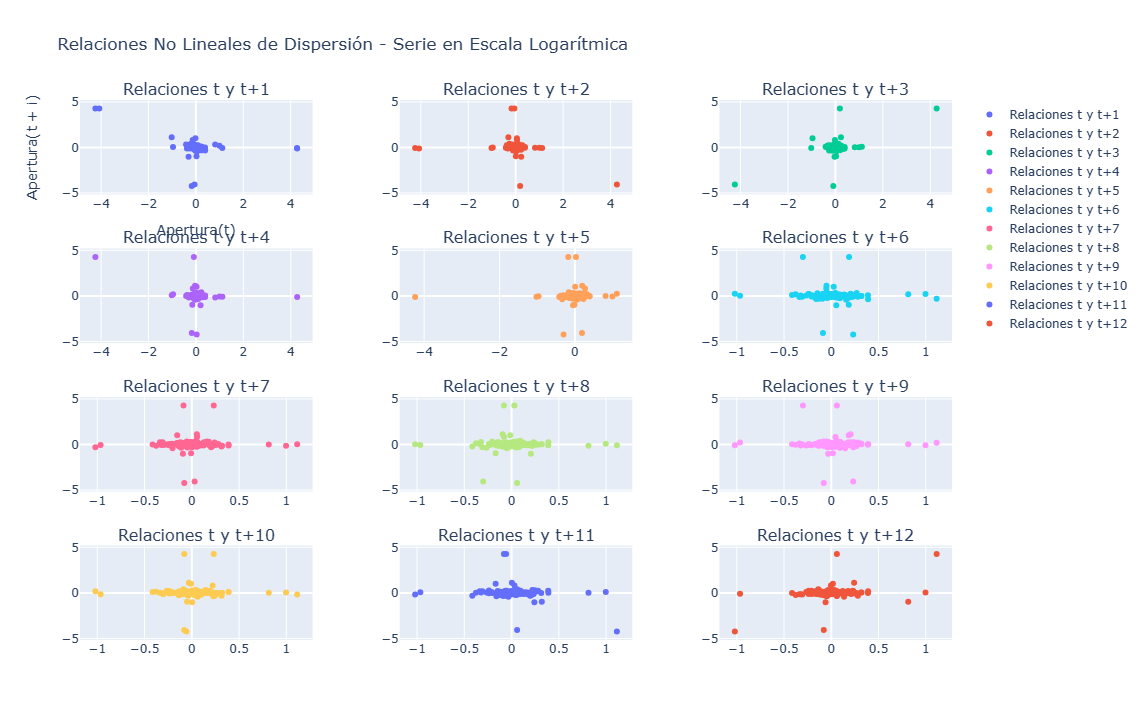

In [50]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convertir la serie en escala logarítmica a un objeto de Pandas Series
diff_lserie = pd.Series(diff_lserie)

# Crear una figura con subtramas para mostrar todas las gráficas en una cuadrícula
fig = make_subplots(rows=4, cols=3, subplot_titles=[f'Relaciones t y t+{i}' for i in range(1, 13)], 
                    horizontal_spacing=0.1, vertical_spacing=0.1)

# Añadir cada relación no lineal de dispersión a la figura
for i in range(1, 13):
    row = (i - 1) // 3 + 1
    col = (i - 1) % 3 + 1
    scatter = go.Scatter(x=diff_lserie[:-i], y=diff_lserie.shift(-i)[:-i], mode='markers', name=f'Relaciones t y t+{i}')
    fig.add_trace(scatter, row=row, col=col)

# Configurar título y etiquetas de ejes
fig.update_layout(title='Relaciones No Lineales de Dispersión - Serie en Escala Logarítmica',
                  xaxis_title='Apertura(t)',
                  yaxis_title='Apertura(t + i)',
                  height=720, width=1080)  # Ajustar el tamaño de la figura

# Mostrar la figura
fig.show()


<h3 style="color: #011f4b;">ANALISIS DE AUTOCORRELACION Y AUTOCORRELACION PARCIAL</h3>

<h3 style="color: #011f4b;">ESCALA ORIGINAL</h3>

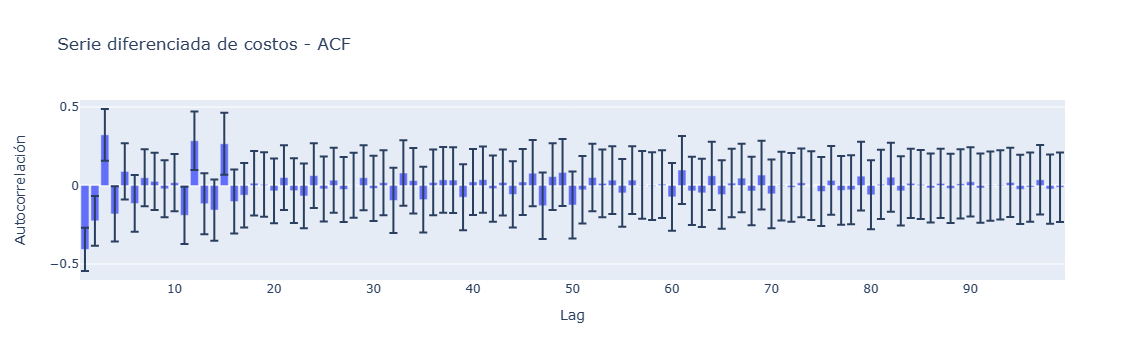

In [51]:
import plotly.graph_objects as go
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

# Calcular ACF y PACF
acf_values, acf_confint = acf(diff_serie, nlags=100, fft=True, alpha=0.1)

# Gráfico de ACF
fig_acf = go.Figure()
fig_acf.add_trace(go.Bar(x=list(range(1, 100)), y=acf_values[1:], error_y=dict(type='data', array=acf_confint[1:, 1]-acf_values[1:])))
fig_acf.update_layout(title="Serie diferenciada de costos - ACF", xaxis_title="Lag", yaxis_title="Autocorrelación")
fig_acf.show()


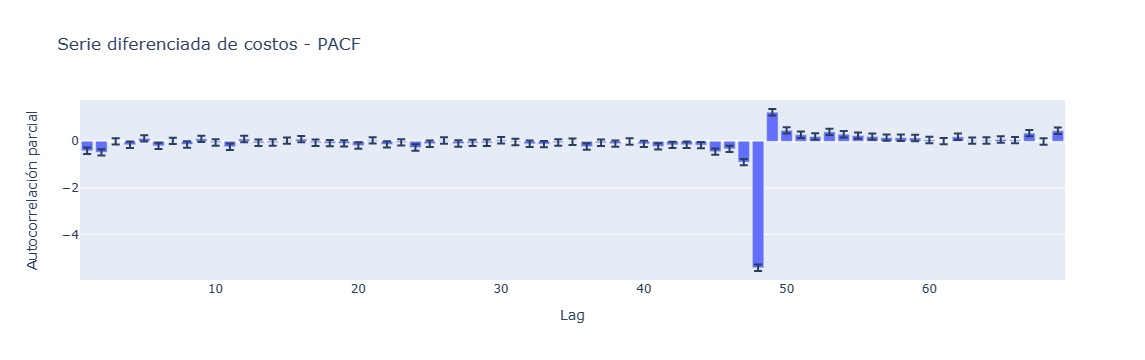

In [54]:
pacf_values, pacf_confint = pacf(diff_serie, nlags=70, alpha=0.1)

# Gráfico de PACF
fig_pacf = go.Figure()
fig_pacf.add_trace(go.Bar(x=list(range(1, 70)), y=pacf_values[1:], error_y=dict(type='data', array=pacf_confint[1:, 1]-pacf_values[1:])))
fig_pacf.update_layout(title="Serie diferenciada de costos - PACF", xaxis_title="Lag", yaxis_title="Autocorrelación parcial")
fig_pacf.show()

No se observan los graficos de Autocorrelacion y Autocorrelacion parcial para la serie diferenciadad con los datos en la escala original, esto significa algo? 

<h3 style="color: #011f4b;">ESCALA LOG</h3>

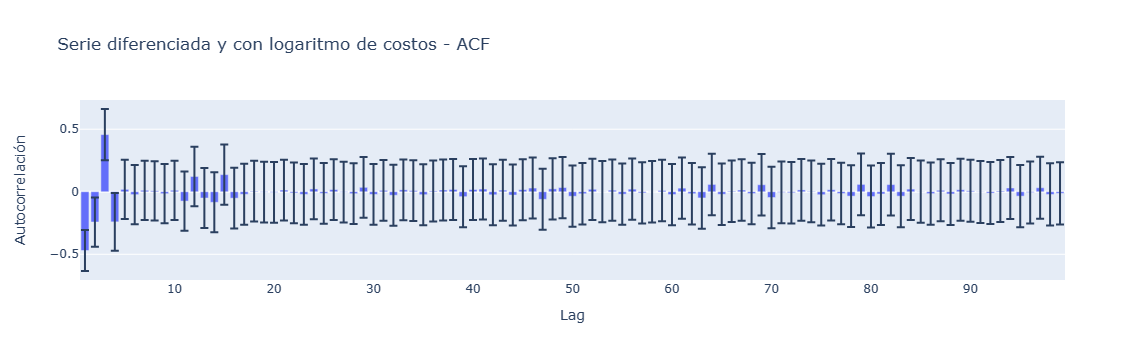

In [56]:
import plotly.graph_objects as go
from statsmodels.tsa.stattools import acf, pacf

# Calcular ACF y PACF
acf_values_log, acf_confint_log = acf(diff_lserie, nlags=100, fft=True, alpha=0.05)
pacf_values_log, pacf_confint_log = pacf(diff_lserie, nlags=70, alpha=0.05)

# Gráfico de ACF
fig_acf_log = go.Figure()
fig_acf_log.add_trace(go.Bar(x=list(range(1, 100)), y=acf_values_log[1:], error_y=dict(type='data', array=acf_confint_log[1:, 1]-acf_values_log[1:])))
fig_acf_log.update_layout(title="Serie diferenciada y con logaritmo de costos - ACF", xaxis_title="Lag", yaxis_title="Autocorrelación")
fig_acf_log.show()


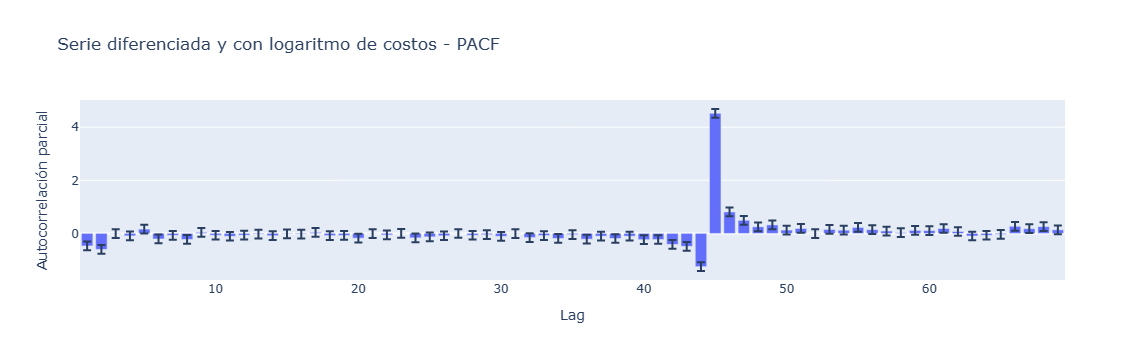

In [57]:
# Gráfico de PACF
fig_pacf_log = go.Figure()
fig_pacf_log.add_trace(go.Bar(x=list(range(1, 70)), y=pacf_values_log[1:], error_y=dict(type='data', array=pacf_confint_log[1:, 1]-pacf_values_log[1:])))
fig_pacf_log.update_layout(title="Serie diferenciada y con logaritmo de costos - PACF", xaxis_title="Lag", yaxis_title="Autocorrelación parcial")
fig_pacf_log.show()

<h3 style="color: #011f4b;">INDICE DE INFORMACION MUTUA</h3>

Indice de informacion mutua tambien contrasta varias de los rezagos, vas por buen camino

<h3 style="color: #011f4b;">ESCALA ORIGINAL</h3>

In [30]:
#pip install pyinform

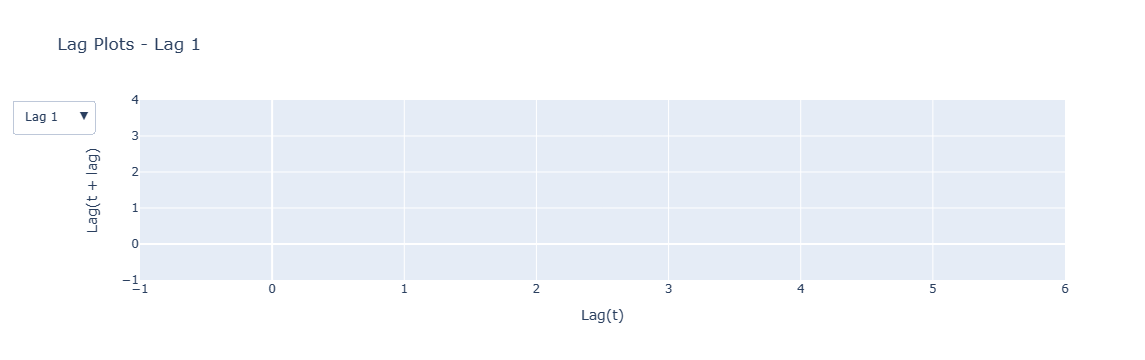

In [59]:
import numpy as np
import plotly.graph_objects as go

# Función para plotear el gráfico de Lag Plot para un lag específico
def lag_plot(x, lag=1):
    x_lagged = x[:-lag]
    x_shifted = x[lag:]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_lagged, y=x_shifted, mode='markers', marker=dict(size=5)))
    corr_value = np.corrcoef(x_lagged, x_shifted)[0, 1]
    fig.add_annotation(text=f'Correlation: {corr_value:.2f}', x=x.max() * 0.9, y=x.min() * 0.9, showarrow=False)
    fig.update_layout(title=f"Lag Plot - Lag {lag}", xaxis_title="Lag(t)", yaxis_title=f"Lag(t + {lag})")
    fig.show()

# Agregar botones para cada gráfico de Lag Plot
buttons = []
for lag in range(1, 13):
    button = dict(label=f"Lag {lag}",
                  method="update",
                  args=[{"visible": [False] * (lag - 1) + [True] + [False] * (12 - lag)},
                        {"title": f"Lag Plot - Lag {lag}"}])
    buttons.append(button)

# Configurar la figura con los gráficos de Lag Plot
fig = go.Figure()
for lag in range(1, 13):
    x = Serie['VAFODO']
    x_lagged = x[:-lag]
    x_shifted = x[lag:]
    fig.add_trace(go.Scatter(x=x_lagged, y=x_shifted, mode='markers', marker=dict(size=5), visible=False))

# Agregar el primer botón activado por defecto
fig.update_layout(updatemenus=[{"active": 0, "buttons": buttons}])

# Configurar diseño y mostrar figura
fig.update_layout(title="Lag Plots - Lag 1", xaxis_title="Lag(t)", yaxis_title="Lag(t + lag)")
fig.show()

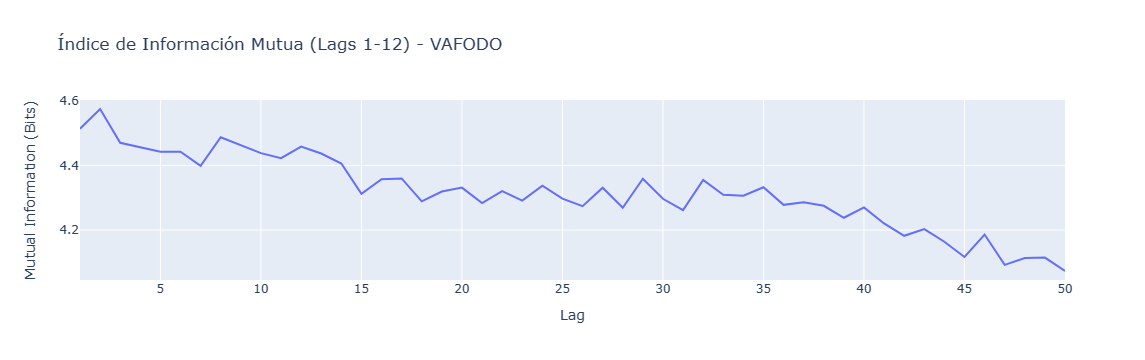

In [60]:
import numpy as np
import plotly.graph_objects as go
import pyinform

# Calcular el índice de información mutua para los primeros 12 lags de Apertura
max_lag = 50
lags = list(range(1, max_lag+1))
ami_apertura = [pyinform.mutualinfo.mutual_info(np.array(Serie['VAFODO'][i:]), np.array(Serie['VAFODO'][:-i])) for i in lags]

# Gráfico del Índice de Información Mutua para los primeros 12 lags de Apertura
fig_ami = go.Figure()
fig_ami.add_trace(go.Scatter(x=lags, y=ami_apertura, mode='lines', name='Mutual Information'))
fig_ami.update_layout(title="Índice de Información Mutua (Lags 1-12) - VAFODO", xaxis_title="Lag", yaxis_title="Mutual Information (Bits)")
fig_ami.show()

<h3 style="color: #011f4b;">ESCALA LOG</h3>

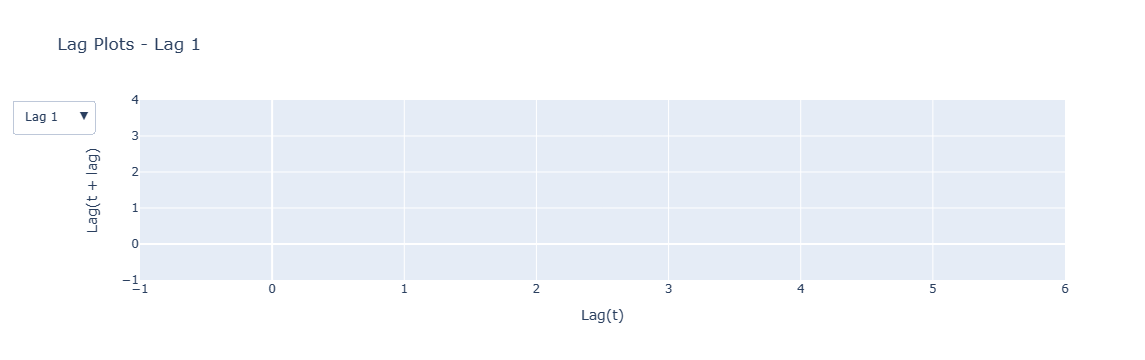

In [61]:
import plotly.graph_objects as go
import numpy as np
import pyinform

# Función para plotear el gráfico de Lag Plot para un lag específico
def lag_plot(x, lag=1):
    x_lagged = x[:-lag]
    x_shifted = x[lag:]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_lagged, y=x_shifted, mode='markers', marker=dict(size=5)))
    corr_value = np.corrcoef(x_lagged, x_shifted)[0, 1]
    fig.add_annotation(text=f'Correlation: {corr_value:.2f}', x=x.max() * 0.9, y=x.min() * 0.9, showarrow=False)
    fig.update_layout(title=f"Lag Plot - Lag {lag}", xaxis_title="Lag(t)", yaxis_title=f"Lag(t + {lag})")
    fig.show()

# Crear una lista de botones para seleccionar cada gráfico de Lag Plot individualmente
buttons = []
for lag in range(1, 13):
    button = dict(label=f"Lag {lag}",
                  method="update",
                  args=[{"visible": [False] * (lag - 1) + [True] + [False] * (12 - lag)},
                        {"title": f"Lag Plot - Lag {lag}"}])
    buttons.append(button)

# Configurar la figura con los gráficos de Lag Plot
fig = go.Figure()
for lag in range(1, 13):
    x = np.log(Serie['VAFODO'])
    x_lagged = x[:-lag]
    x_shifted = x[lag:]
    fig.add_trace(go.Scatter(x=x_lagged, y=x_shifted, mode='markers', marker=dict(size=5), visible=False))

# Agregar el primer botón activado por defecto
fig.update_layout(updatemenus=[{"active": 0, "buttons": buttons}])

# Configurar diseño y mostrar figura
fig.update_layout(title="Lag Plots - Lag 1", xaxis_title="Lag(t)", yaxis_title="Lag(t + lag)")
fig.show()

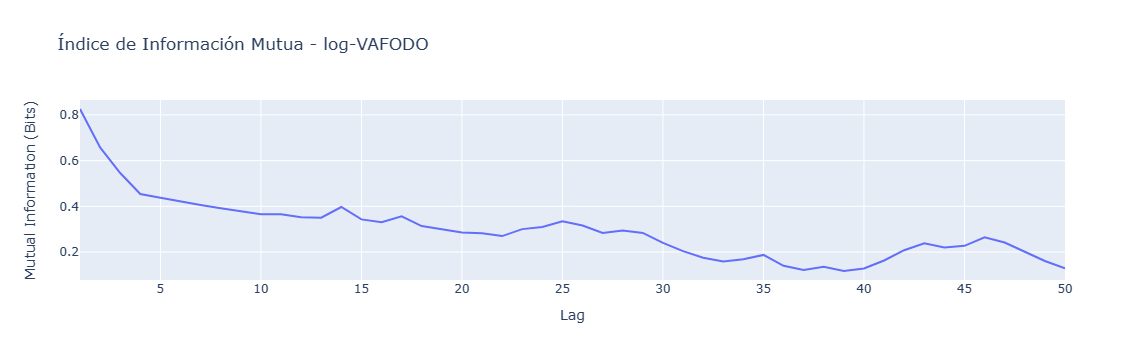

In [62]:
# Calcular el índice de información mutua para la serie en escala logarítmica
lag_max = 50
ami_logapertura = [pyinform.mutualinfo.mutual_info(np.array(np.log(Serie['VAFODO'][i:])), np.array(np.log(Serie['VAFODO'][:-i]))) for i in range(1, lag_max+1)]

# Graficar el índice de información mutua
fig_ami = go.Figure()
fig_ami.add_trace(go.Scatter(x=list(range(1, lag_max+1)), y=ami_logapertura, mode='lines'))
fig_ami.update_layout(title="Índice de Información Mutua - log-VAFODO", xaxis_title="Lag", yaxis_title="Mutual Information (Bits)")
fig_ami.show()

<h3 style="color: #011f4b;">ESTACIONALIDAD DE LAS SUBSERIES</h3>

Monthplot lo que hace es tomar cada enero y compararlo con la informacion que se tiene de cada año para ese mes y aspi suceviamente, se muestra un grafico el cual corresponde 12 subgraficacos cada uno respresentando un mes y donde el eje x es el año (vas por buen camino solo faltan los otros meses)

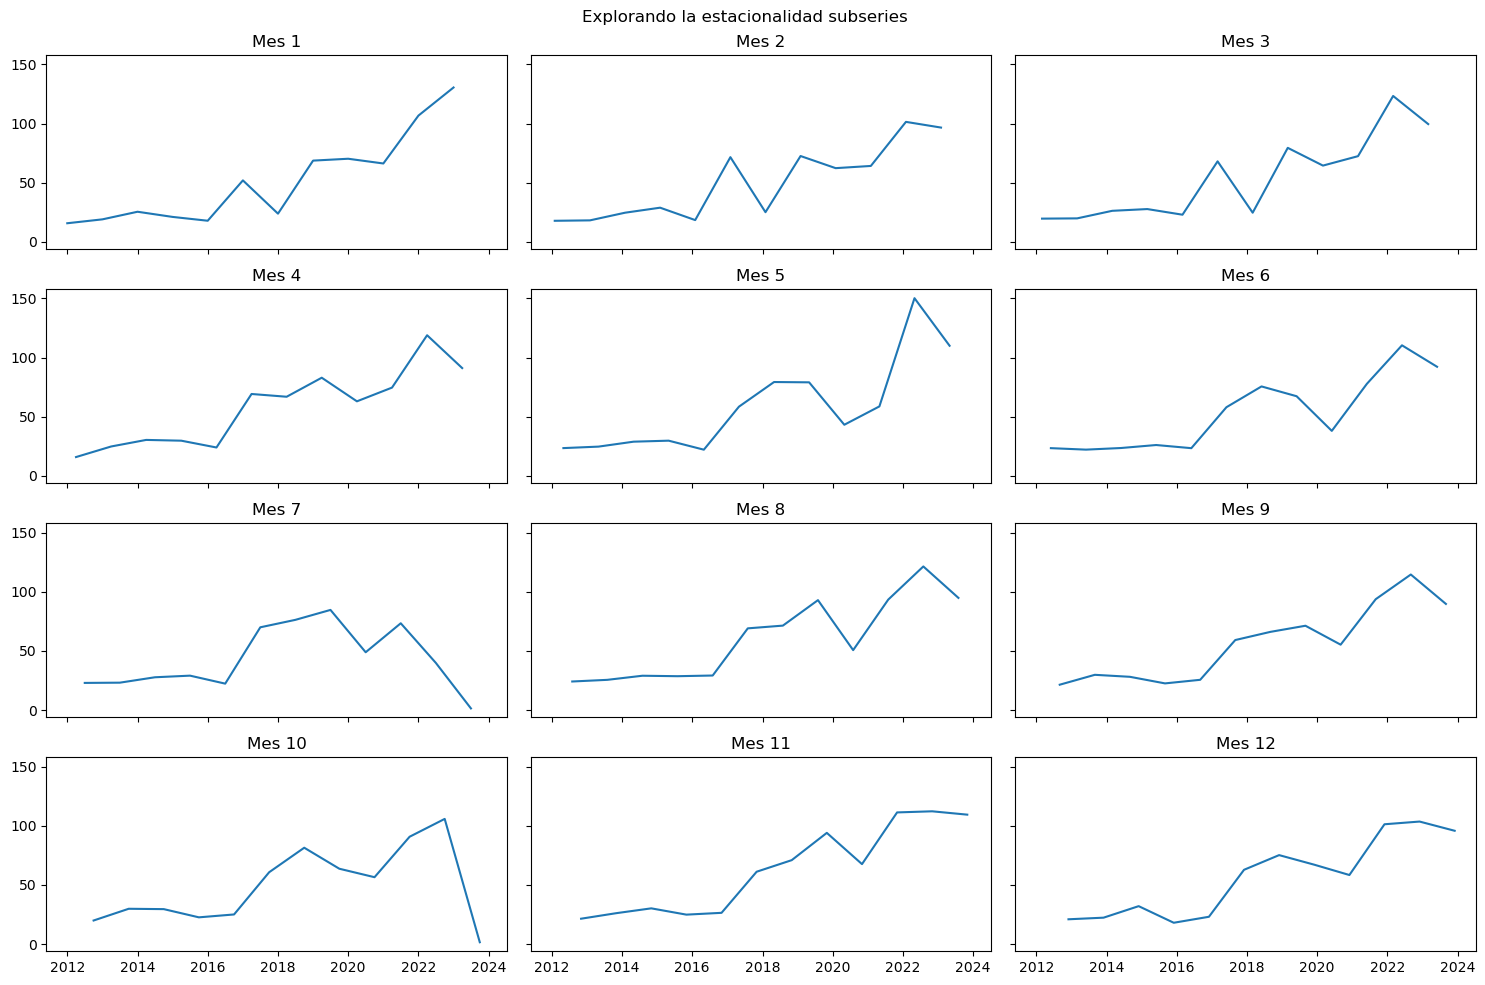

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Función para graficar subseries mensuales
def monthplot(series):
    # Convertir el índice a un índice de fecha si aún no lo es
    if not isinstance(series.index, pd.DatetimeIndex):
        series.index = pd.to_datetime(series.index)
    
    # Dividir la serie en subseries mensuales
    subseries = [series[series.index.month == i] for i in range(1, 13)]
    
    # Configurar la figura
    fig, axes = plt.subplots(4, 3, figsize=(15, 10), sharex=True, sharey=True)
    fig.suptitle('Explorando la estacionalidad subseries')

    # Graficar cada subserie mensual
    for i, ax in enumerate(axes.flatten()):
        if i < len(subseries):  # Verificar si hay datos para este mes
            ax.plot(subseries[i], label='VAFODO')
            ax.set_title(f'Mes {i+1}')
        else:
            ax.axis('off')  # Ocultar ejes si no hay datos para este mes

    plt.tight_layout()
    plt.show()

# Utilizar la función monthplot con tu serie de tiempo
monthplot(Serie.set_index('fecha_completa')['VAFODO'])

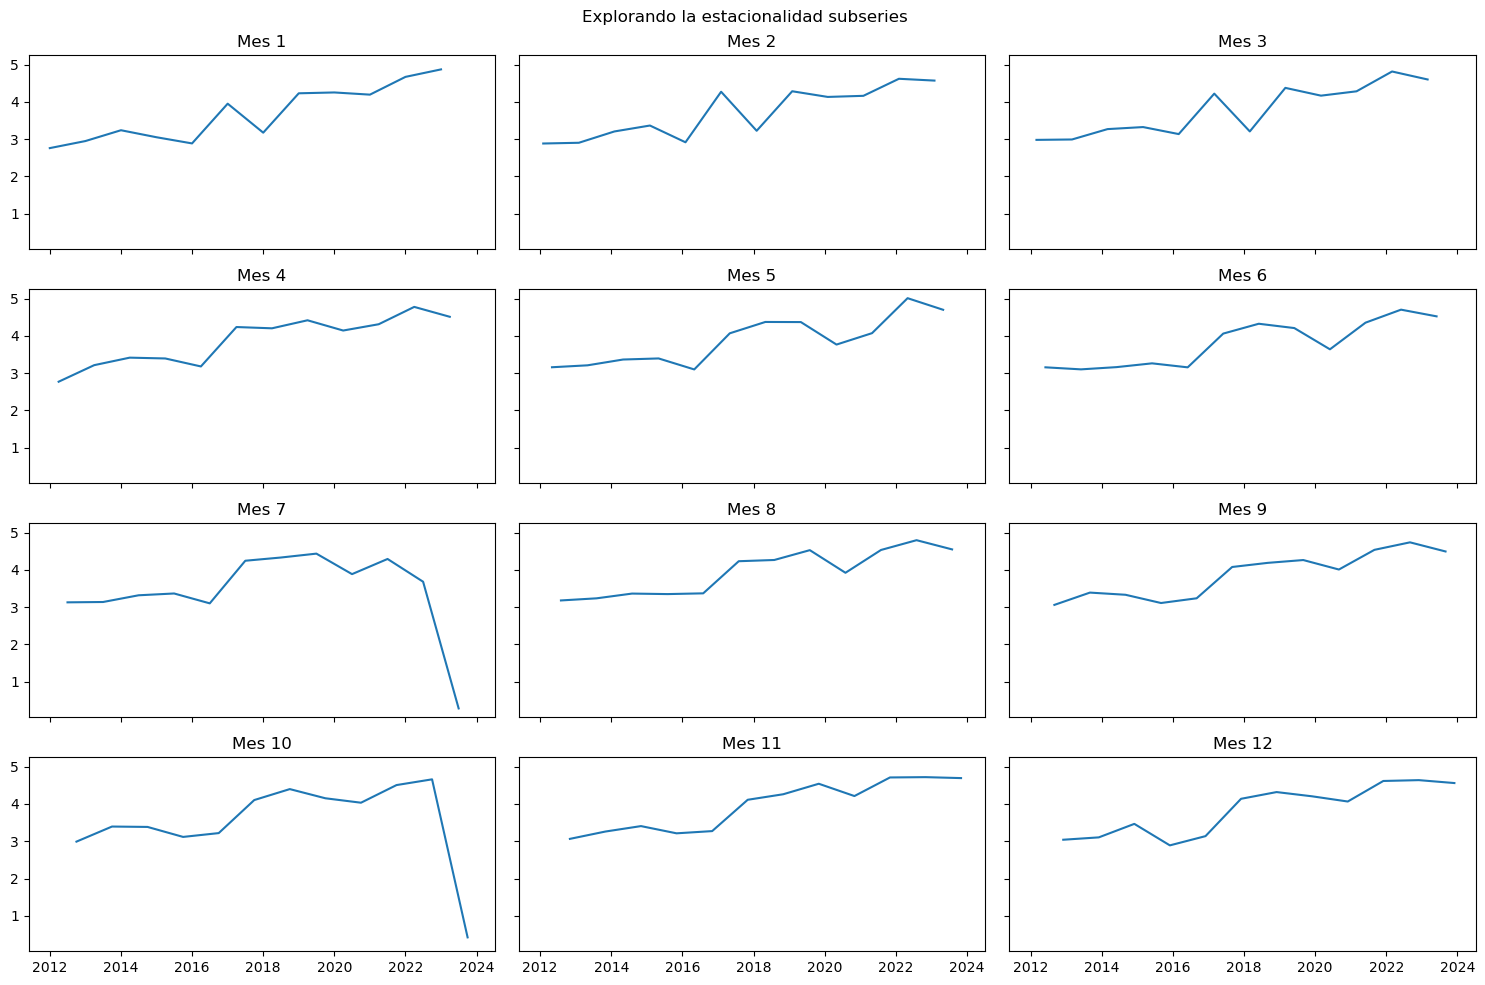

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Función para graficar subseries mensuales
def monthplot(series):
    # Convertir el índice a un índice de fecha si aún no lo es
    if not isinstance(series.index, pd.DatetimeIndex):
        series.index = pd.to_datetime(series.index)
    
    # Dividir la serie en subseries mensuales
    subseries = [series[series.index.month == i] for i in range(1, 13)]
    
    # Configurar la figura
    fig, axes = plt.subplots(4, 3, figsize=(15, 10), sharex=True, sharey=True)
    fig.suptitle('Explorando la estacionalidad subseries')

    # Graficar cada subserie mensual
    for i, ax in enumerate(axes.flatten()):
        if i < len(subseries):  # Verificar si hay datos para este mes
            ax.plot(subseries[i], label='VAFODO')
            ax.set_title(f'Mes {i+1}')
        else:
            ax.axis('off')  # Ocultar ejes si no hay datos para este mes

    plt.tight_layout()
    plt.show()

# Aplicar logaritmo natural a la serie de tiempo
log_original_data = np.log(Serie['VAFODO'])

# Convertir los datos logaritmizados a una serie de pandas
log_series = pd.Series(log_original_data.values, index=Serie['fecha_completa'])

# Utilizar la función monthplot con la serie de tiempo logaritmizada
monthplot(log_series)